# Electric Car Portfolio

## Auto Industry Electric Car. Tesla is number one making electric cars. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from tabulate import tabulate
from scipy.stats import norm
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['APTV','DLPH','BWA','MGA', 'TEL', 'APH']
start = '2012-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  6 of 6 downloaded


,APH,APTV,BWA,DLPH,MGA,TEL
Date,,,,,,
2012-01-03,20.987455,16.755810,29.935097,20.233074,13.095776,26.712214
2012-01-04,20.923529,16.981829,30.205029,20.505997,12.999539,26.788586
2012-01-05,21.101624,16.680466,30.241634,20.142094,13.115023,27.085575
2012-01-06,21.110752,16.989363,29.793272,20.515102,13.942646,27.458939
2012-01-09,21.471506,17.109905,29.445557,20.660658,13.934944,27.840778


In [3]:
df.tail()

,APH,APTV,BWA,DLPH,MGA,TEL
Date,,,,,,
2018-12-24,75.083298,59.447056,32.739914,13.84,43.011356,69.623863
2018-12-26,78.259315,61.089565,33.923286,14.34,44.535961,72.006348
2018-12-27,79.817551,61.307251,34.288158,14.24,45.523048,74.044266
2018-12-28,79.867188,60.733360,34.031761,14.31,44.496872,73.591400
2018-12-31,80.413063,60.921356,34.258575,14.32,44.418686,74.457756


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
7 years


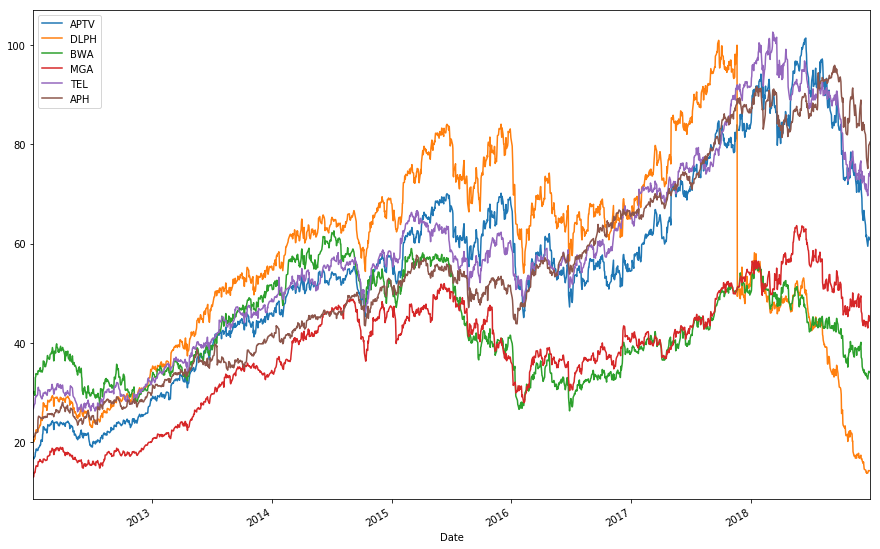

In [5]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.legend()

In [6]:
for s in symbols:
    print(s + ":",  df[s].max())

APTV: 101.32328000000001
DLPH: 100.869919
BWA: 62.548565
MGA: 63.601349
TEL: 102.523895
APH: 95.84391


In [7]:
for s in symbols:
    print(s + ":",  df[s].min())

APTV: 16.680466
DLPH: 13.78
BWA: 26.344611999999998
MGA: 12.999539
TEL: 26.155306
APH: 20.923529000000002


In [8]:
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = (np.log(1 + df[s].pct_change())).dropna()
    
returns.head(4)

,APTV Return,DLPH Return,BWA Return,MGA Return,TEL Return,APH Return
Date,,,,,,
2012-01-04,0.013399,0.013399,0.008977,-0.007376,0.002855,-0.003051
2012-01-05,-0.017906,-0.017906,0.001211,0.008844,0.011025,0.008476
2012-01-06,0.018349,0.018349,-0.014937,0.061194,0.013690,0.000432
2012-01-09,0.007070,0.007070,-0.011740,-0.000553,0.013810,0.016944


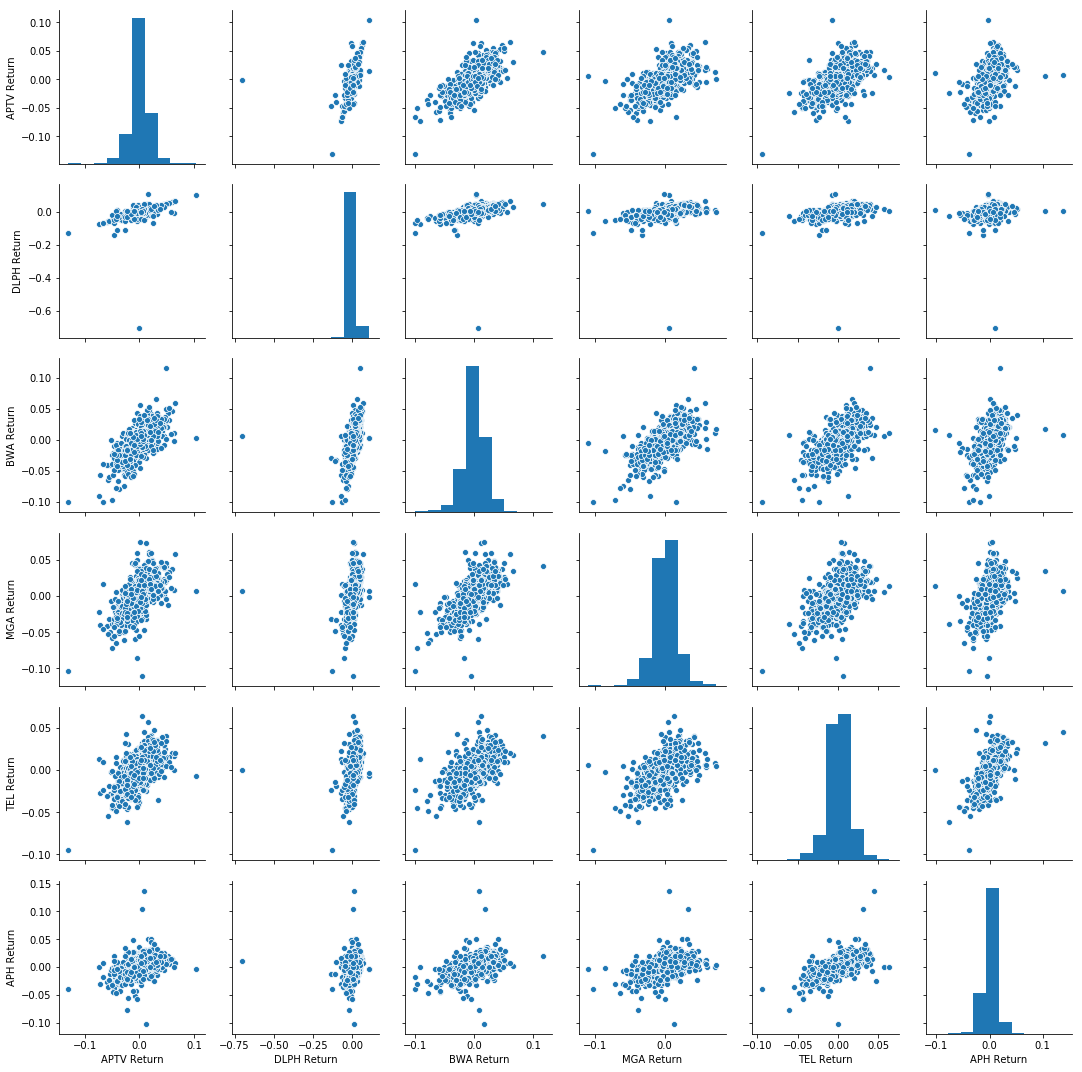

In [9]:
sns.pairplot(returns[1:])

In [10]:
# dates each bank stock had the best and worst single day returns. 
print('Best Day Returns')
print('-'*20)
print(returns.idxmax())
print('\n')
print('Worst Day Returns')
print('-'*20)
print(returns.idxmin())

Best Day Returns
--------------------
APTV Return   2017-05-03
DLPH Return   2017-12-05
BWA Return    2012-01-10
MGA Return    2016-02-26
TEL Return    2014-01-22
APH Return    2012-07-18
dtype: datetime64[ns]


Worst Day Returns
--------------------
APTV Return   2016-06-24
DLPH Return   2017-11-21
BWA Return    2016-01-13
MGA Return    2015-11-05
TEL Return    2016-06-24
APH Return    2013-07-18
dtype: datetime64[ns]


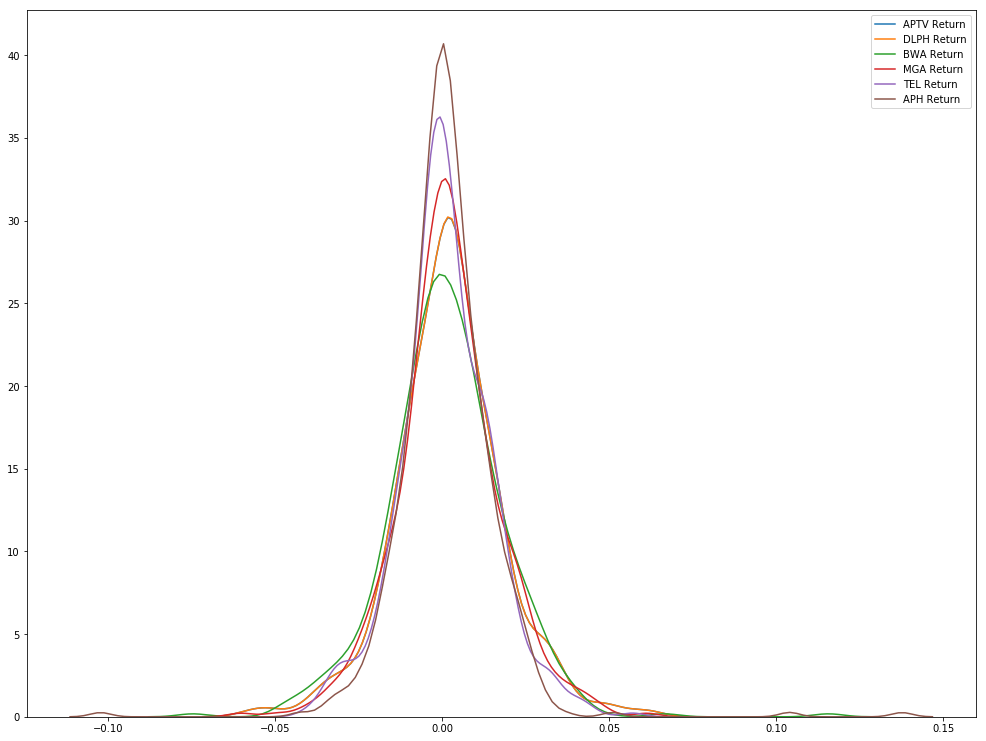

In [11]:
plt.figure(figsize=(17,13))

for r in returns:
    sns.kdeplot(returns.ix["2012-01-01" : "2013-12-31 "][r])

In [12]:
returns.corr()

,APTV Return,DLPH Return,BWA Return,MGA Return,TEL Return,APH Return
APTV Return,1.000000,0.655947,0.699680,0.625162,0.560528,0.462075
DLPH Return,0.655947,1.000000,0.489578,0.437349,0.373882,0.281982
BWA Return,0.699680,0.489578,1.000000,0.680684,0.595405,0.479691
MGA Return,0.625162,0.437349,0.680684,1.000000,0.569181,0.477818
TEL Return,0.560528,0.373882,0.595405,0.569181,1.000000,0.665304
APH Return,0.462075,0.281982,0.479691,0.477818,0.665304,1.000000


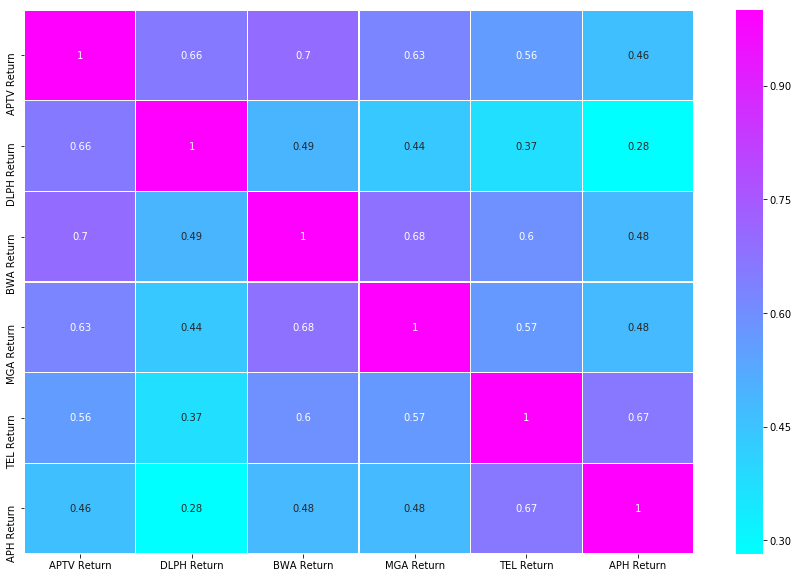

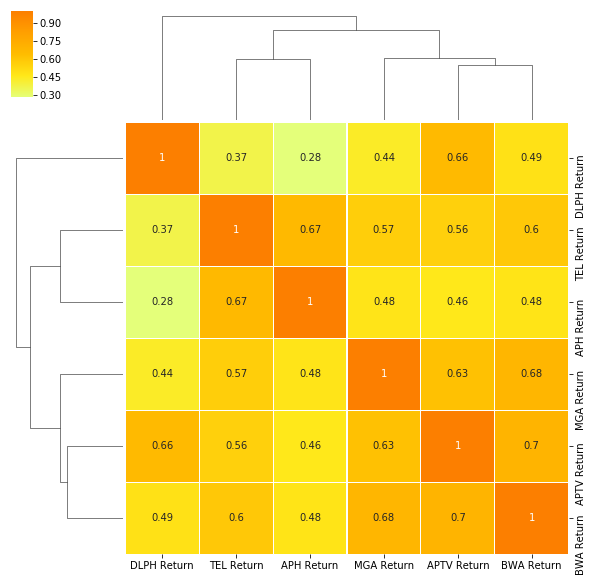

In [13]:
# Heatmap for return of all the banks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="cool",linewidths=.1, annot= True)

sns.clustermap(returns.corr(), cmap="Wistia",linewidths=.1, annot= True)

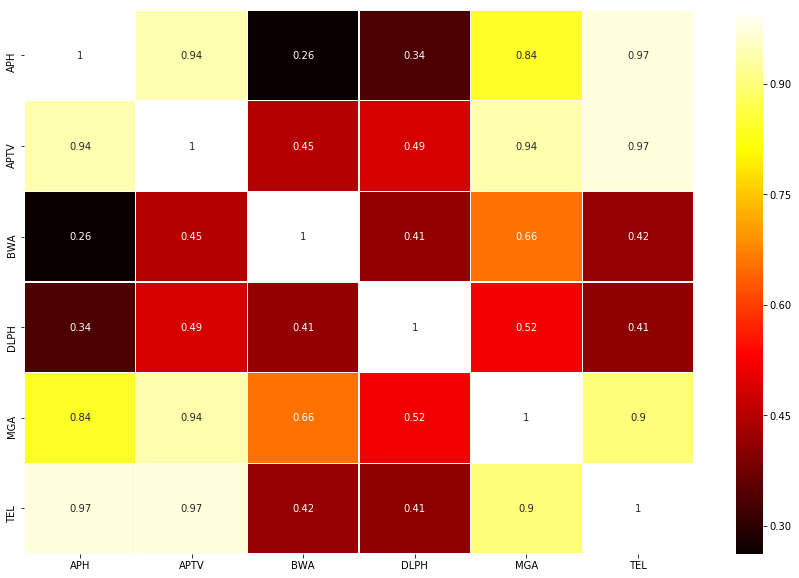

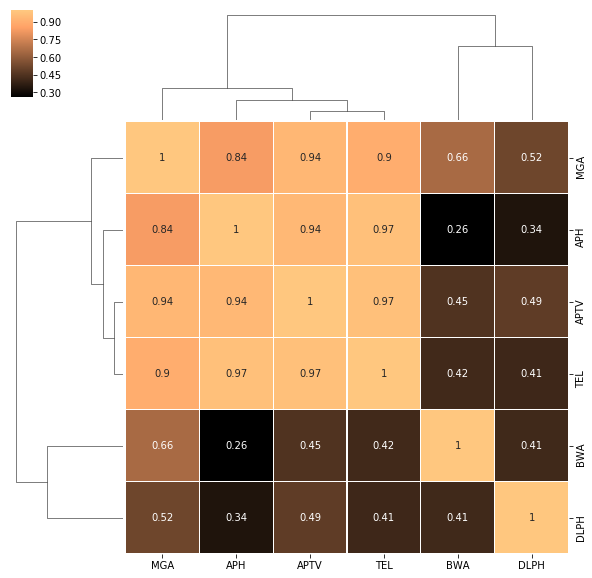

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="hot",linewidths=.1, annot= True)

sns.clustermap(df.corr(), cmap="copper",linewidths=.1, annot= True)

In [15]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.16, 0.16, 0.16, 0.16, 0.16, 0.16]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
APH: 16000.0
APTV: 16000.0
BWA: 16000.0
DLPH: 16000.0
MGA: 16000.0
TEL: 16000.0


In [16]:
print('Number of Shares:')
percent_invest = [0.16, 0.16, 0.16, 0.16, 0.16, 0.16]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
APH: 762
APTV: 954
BWA: 534
DLPH: 790
MGA: 1221
TEL: 598


In [17]:
print('Beginning Value:')
percent_invest = [0.16, 0.16, 0.16, 0.16, 0.16, 0.16]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
APH: $15992.44
APTV: $15985.04
BWA: $15985.34
DLPH: $15984.13
MGA: $15989.94
TEL: $15973.9


In [18]:
print('Current Value:')
percent_invest = [0.16, 0.16, 0.16, 0.16, 0.16, 0.16]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
APH: $61274.75
APTV: $58118.97
BWA: $18294.08
DLPH: $11312.8
MGA: $54235.22
TEL: $44525.74


In [19]:
result = []
percent_invest = [0.16, 0.16, 0.16, 0.16, 0.16, 0.16]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $247761.56


In [20]:
# Calculate Daily Returns
returns = df.pct_change()
returns = returns.dropna()

In [21]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

APH     0.000842
APTV    0.000879
BWA     0.000242
DLPH    0.000088
MGA     0.000836
TEL     0.000671
dtype: float64


In [22]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

APH     0.012556
APTV    0.017006
BWA     0.018171
DLPH    0.022068
MGA     0.016787
TEL     0.013232
dtype: float64


In [23]:
# Define weights for the portfolio
weights = np.array([0.16, 0.16, 0.16, 0.16, 0.16, 0.16])

In [24]:
# Calculate the covariance matrix on daily returns
cov_matrix = (returns.cov())*250
print (cov_matrix)

           APH      APTV       BWA      DLPH       MGA       TEL
APH   0.039413  0.024463  0.027225  0.022212  0.025013  0.027519
APTV  0.024463  0.072297  0.053788  0.069516  0.044385  0.031306
BWA   0.027225  0.053788  0.082546  0.055476  0.051807  0.035694
DLPH  0.022212  0.069516  0.055476  0.121744  0.045733  0.030671
MGA   0.025013  0.044385  0.051807  0.045733  0.070447  0.031455
TEL   0.027519  0.031306  0.035694  0.030671  0.031455  0.043769


In [25]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [26]:
# Print the portfolio return
print(portReturn)

0.0005693437365548716


In [27]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

In [28]:
returns.head()

,APH,APTV,BWA,DLPH,MGA,TEL,Portfolio
Date,,,,,,,
2012-01-04,-0.003046,0.013489,0.009017,0.013489,-0.007349,0.002859,0.004554
2012-01-05,0.008512,-0.017746,0.001212,-0.017746,0.008884,0.011086,-0.000928
2012-01-06,0.000433,0.018518,-0.014826,0.018519,0.063105,0.013785,0.015925
2012-01-09,0.017089,0.007095,-0.011671,0.007095,-0.000552,0.013906,0.005274
2012-01-10,0.020417,0.049318,0.122592,0.049317,0.042818,0.041146,0.052097


In [29]:
returns.tail()

,APH,APTV,BWA,DLPH,MGA,TEL,Portfolio
Date,,,,,,,
2018-12-24,-0.020965,-0.022135,-0.016879,0.004354,-0.028262,-0.017641,-0.016245
2018-12-26,0.042300,0.027630,0.036145,0.036127,0.035447,0.034219,0.033899
2018-12-27,0.019911,0.003563,0.010756,-0.006974,0.022164,0.028302,0.012436
2018-12-28,0.000622,-0.009361,-0.007478,0.004916,-0.022542,-0.006116,-0.006393
2018-12-31,0.006835,0.003095,0.006665,0.000699,-0.001757,0.011773,0.004369


In [30]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

                 APH      APTV       BWA      DLPH       MGA       TEL  \
Date                                                                     
2018-12-24  3.577532  3.547847  1.093697  0.684029  3.284369  2.606443   
2018-12-26  3.728862  3.645874  1.133228  0.708741  3.400788  2.695634   
2018-12-27  3.803108  3.658865  1.145417  0.703798  3.476163  2.771925   
2018-12-28  3.805473  3.624615  1.136852  0.707258  3.397803  2.754972   
2018-12-31  3.831482  3.635835  1.144428  0.707752  3.391833  2.787405   

            Portfolio  
Date                   
2018-12-24   2.257880  
2018-12-26   2.334419  
2018-12-27   2.363449  
2018-12-28   2.348338  
2018-12-31   2.358599  


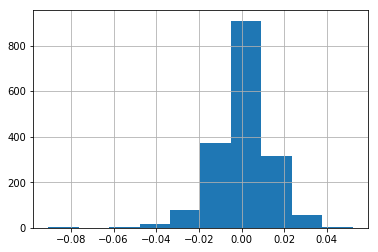

In [31]:
returns['Portfolio'].hist()
plt.show()

In [32]:
# 99% confidence interval
# 0.01 empirical quantile of daily returns
var99 = round((returns['Portfolio']).quantile(0.01), 3)

In [33]:
print('Value at Risk (99% confidence)')
print(var99)

Value at Risk (99% confidence)
-0.036


In [34]:
# the percent value of the 5th quantile
print('Percent Value-at-Risk of the 5th quantile')
var_1_perc = round(np.quantile(var99, 0.01), 3)
print("{:.1f}%".format(-var_1_perc*100))

Percent Value-at-Risk of the 5th quantile
3.6%


In [35]:
print('Value-at-Risk of 99% for 100,000 investment')
print("${}".format(-var99 * 100000))

Value-at-Risk of 99% for 100,000 investment
$3599.9999999999995


In [36]:
# 95% confidence interval
# 0.05 empirical quantile of daily returns
var95 = round((returns['Portfolio']).quantile(0.05), 3)

In [37]:
print('Value at Risk (95% confidence)')
print(var95)

Value at Risk (95% confidence)
-0.021


In [38]:
print('Percent Value-at-Risk of the 5th quantile')
print("{:.1f}%".format(-var95*100))

Percent Value-at-Risk of the 5th quantile
2.1%


In [39]:
# VaR for 100,000 investment
print('Value-at-Risk of 99% for 100,000 investment')
var_100k = "${}".format(int(-var95 * 100000))
print("${}".format(int(-var95 * 100000)))

Value-at-Risk of 99% for 100,000 investment
$2100


In [40]:
mean = np.mean(returns['Portfolio'])
std_dev = np.std(returns['Portfolio'])

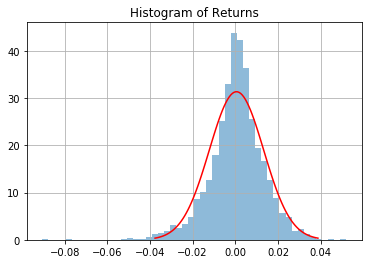

In [41]:
returns['Portfolio'].hist(bins=50, normed=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, mlab.normpdf(x, mean, std_dev), "r")
plt.title('Histogram of Returns')
plt.show()

In [42]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [43]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0157412
95%                      -0.020365
99%                      -0.0290385


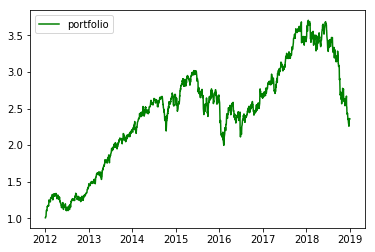

In [44]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='green', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [45]:
# Print the mean
print("mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", returns['Portfolio'].kurtosis())

mean :  0.0569343736554873
Std. dev:  1.2730791008104436
skew:  -0.6206217132623457
kurt:  3.253055023400178


In [46]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

20.13%


In [47]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

4.05%


In [48]:
# Calculate total return and annualized return from price data 
total_return = returns['Portfolio'][-1] - returns['Portfolio'][0]
                
# Annualize the total return over 5 year 
annualized_return = ((1+total_return)**(1/7))-1

In [49]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(250)

In [50]:
# Calculate the Sharpe ratio 
rf = 0.001
sharpe_ratio = (annualized_return - rf) / vol_port
print(sharpe_ratio)

-0.005098564303148075


In [51]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.0569343736554873
--------------------------------------------------
Downside risk:
APH          1.096121
APTV         1.344966
BWA          1.480301
DLPH         2.298698
MGA          1.438537
TEL          1.168615
Portfolio    0.974102
dtype: float64
--------------------------------------------------
Sortino ratio:
APH         -0.860366
APTV        -0.701182
BWA         -0.637077
DLPH        -0.410261
MGA         -0.655573
TEL         -0.806994
Portfolio   -0.968138
dtype: float64


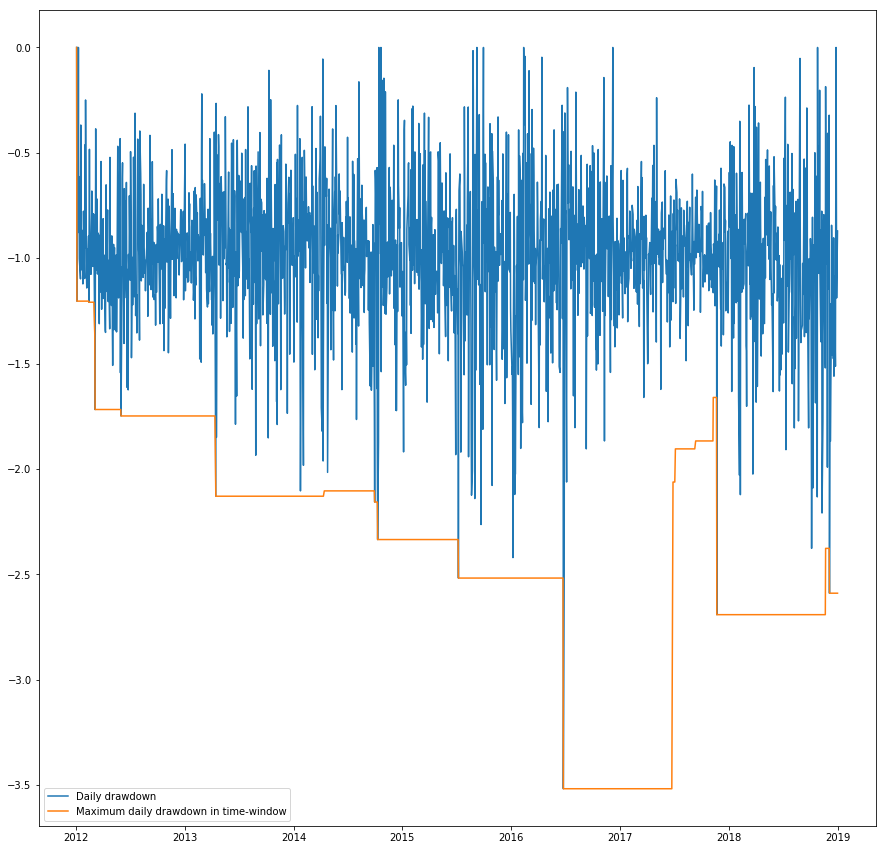

In [52]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

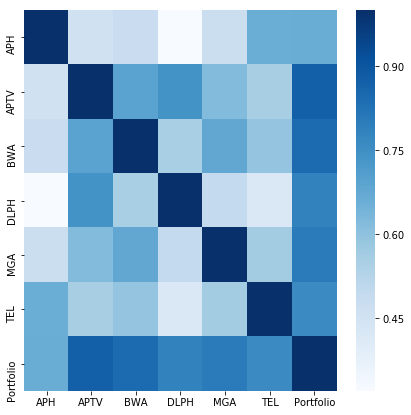

In [53]:
plt.figure(figsize=(7,7))
corr = returns.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

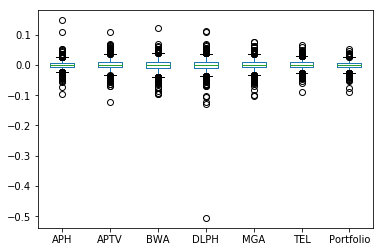

In [54]:
# Box plot
returns.plot(kind='box')

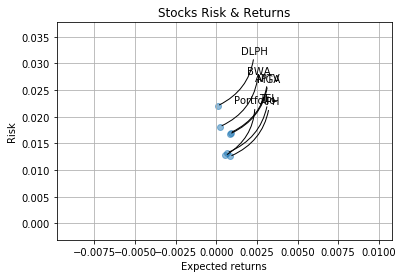

In [55]:
rets = returns.dropna()

plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

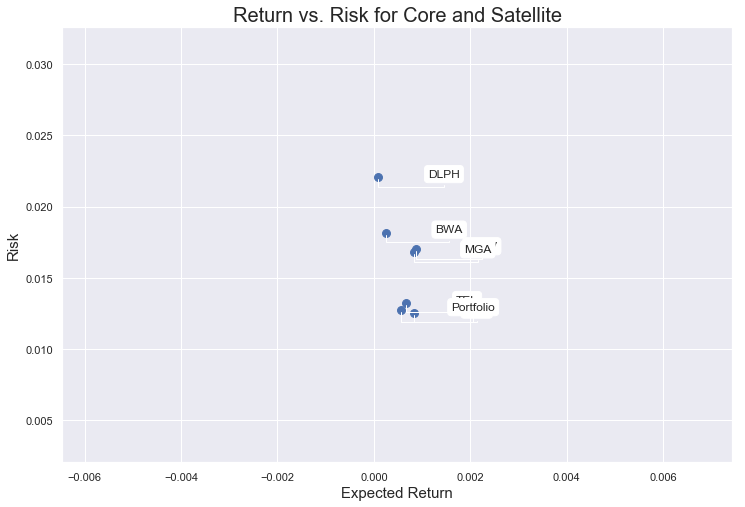

In [56]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Core and Satellite", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [57]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
DLPH,0.000088,0.022068
BWA,0.000242,0.018171
Portfolio,0.000569,0.012731
TEL,0.000671,0.013232
MGA,0.000836,0.016787
APH,0.000842,0.012556
APTV,0.000879,0.017006


In [58]:
table.sort_values(by='Risk')

,Returns,Risk
APH,0.000842,0.012556
Portfolio,0.000569,0.012731
TEL,0.000671,0.013232
MGA,0.000836,0.016787
APTV,0.000879,0.017006
BWA,0.000242,0.018171
DLPH,0.000088,0.022068


In [59]:
rf = 0.001
table['Sharpe_Ratio'] = ((table['Returns'] - rf) / table['Risk']) * np.sqrt(252)
table

,Returns,Risk,Sharpe_Ratio
APH,0.000842,0.012556,-0.199414
APTV,0.000879,0.017006,-0.113060
BWA,0.000242,0.018171,-0.661827
DLPH,0.000088,0.022068,-0.655917
MGA,0.000836,0.016787,-0.155114
TEL,0.000671,0.013232,-0.395143
Portfolio,0.000569,0.012731,-0.537002
